In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
(ds_train, ds_test), ds_info = tfds.load('mnist', 
                                        split=['train', 'test'],
                                        shuffle_files=True,
                                        as_supervised=True,
                                        with_info=True)

In [3]:
def normalize(image, label):
    return tf.cast(image, tf.float32) / 255, label

In [4]:
ds_train = ds_train.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [5]:
ds_test = ds_test.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache().shuffle(ds_info.splits['test'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

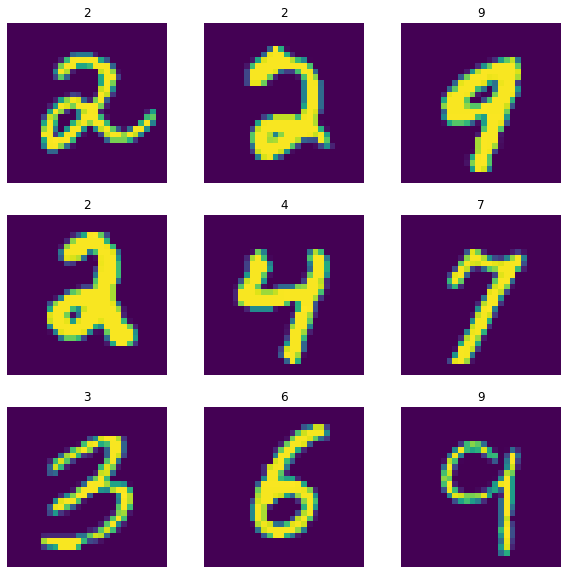

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        image = np.squeeze(images[i])
        plt.imshow(images[i])
        plt.title(classes[labels[i]])
        plt.axis('off')

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])

In [14]:
history = model.fit(
    ds_train,
    validation_data = ds_test,
    epochs=7
)

Epoch 1/7
469/469 [==============================] - 2s 3ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.0891 - val_accuracy: 0.9770
Epoch 2/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0901 - val_accuracy: 0.9768
Epoch 3/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0786 - val_accuracy: 0.9808
Epoch 4/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.0911 - val_accuracy: 0.9769
Epoch 5/7
469/469 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0872 - val_accuracy: 0.9801
Epoch 6/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0868 - val_accuracy: 0.9790
Epoch 7/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0858 - val_accuracy: 0.9793


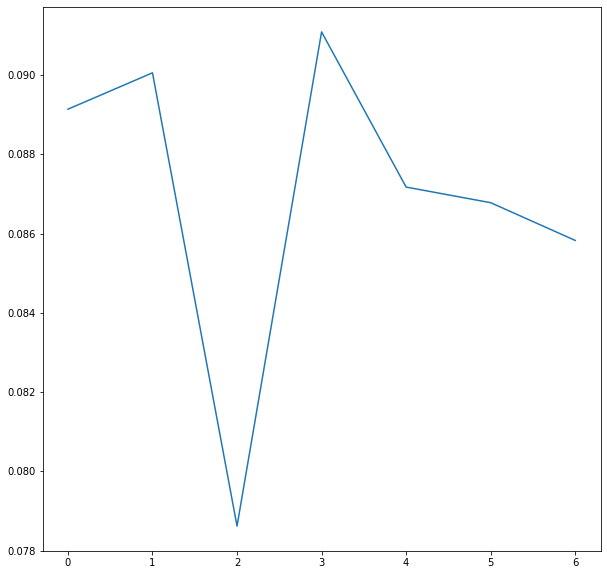

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(range(7), history.history['val_loss'])

In [17]:
model.evaluate(ds_test)

79/79 [==============================] - 0s 1ms/step - loss: 0.0858 - accuracy: 0.9793


[0.08582888543605804, 0.9793000221252441]

In [18]:
pred = model.predict(ds_test)

In [19]:
pred

array([[2.3903280e-17, 9.9962842e-01, 3.7400518e-08, ..., 1.0743463e-12,
        9.7206366e-06, 1.8061359e-13],
       [1.5603514e-10, 1.8618217e-23, 2.1235669e-09, ..., 1.6270449e-11,
        3.4538832e-06, 9.9999654e-01],
       [3.8397005e-21, 1.6419646e-14, 2.0510528e-14, ..., 1.5784994e-21,
        3.6392533e-14, 5.1987763e-12],
       ...,
       [6.5557153e-08, 2.4439267e-13, 3.2220604e-09, ..., 1.3675801e-14,
        8.1517356e-08, 1.4812044e-11],
       [5.5514190e-16, 3.6642928e-19, 3.0772575e-11, ..., 7.9313733e-10,
        6.1635988e-11, 1.0000000e+00],
       [2.2654584e-12, 1.0856014e-15, 1.7295859e-11, ..., 7.2556249e-15,
        9.9999988e-01, 9.2328800e-14]], dtype=float32)

In [21]:
pred = list(map(lambda x: np.argmax(x), pred))

In [22]:
pred

[1,
 9,
 3,
 2,
 6,
 8,
 3,
 9,
 6,
 5,
 5,
 3,
 4,
 1,
 0,
 0,
 1,
 5,
 2,
 7,
 5,
 8,
 9,
 0,
 1,
 0,
 7,
 8,
 2,
 1,
 2,
 5,
 6,
 3,
 7,
 3,
 9,
 7,
 0,
 0,
 1,
 2,
 1,
 3,
 2,
 5,
 9,
 8,
 4,
 6,
 0,
 1,
 8,
 4,
 6,
 9,
 1,
 5,
 1,
 1,
 6,
 5,
 4,
 3,
 2,
 9,
 9,
 5,
 9,
 5,
 9,
 4,
 2,
 3,
 7,
 1,
 3,
 2,
 3,
 5,
 5,
 0,
 9,
 9,
 2,
 5,
 2,
 9,
 6,
 5,
 6,
 7,
 6,
 1,
 9,
 8,
 7,
 3,
 6,
 4,
 0,
 5,
 5,
 0,
 7,
 5,
 4,
 4,
 8,
 6,
 0,
 9,
 4,
 8,
 3,
 7,
 8,
 7,
 0,
 9,
 7,
 1,
 1,
 9,
 6,
 7,
 8,
 8,
 8,
 4,
 0,
 9,
 8,
 6,
 5,
 4,
 2,
 2,
 4,
 9,
 9,
 4,
 4,
 4,
 8,
 3,
 6,
 7,
 0,
 5,
 3,
 9,
 3,
 8,
 5,
 2,
 9,
 1,
 3,
 3,
 4,
 4,
 7,
 4,
 7,
 0,
 8,
 1,
 1,
 7,
 2,
 1,
 8,
 8,
 5,
 7,
 4,
 7,
 6,
 9,
 1,
 6,
 1,
 7,
 7,
 7,
 6,
 2,
 1,
 0,
 7,
 4,
 4,
 9,
 2,
 3,
 4,
 8,
 1,
 8,
 3,
 3,
 2,
 3,
 4,
 1,
 5,
 9,
 8,
 5,
 3,
 7,
 6,
 1,
 3,
 0,
 5,
 8,
 1,
 7,
 5,
 7,
 0,
 1,
 1,
 2,
 8,
 0,
 7,
 3,
 7,
 1,
 3,
 5,
 4,
 4,
 0,
 5,
 4,
 2,
 9,
 0,
 8,
 9,
 6,
 3,
 5,
 2,
 1,
 7,


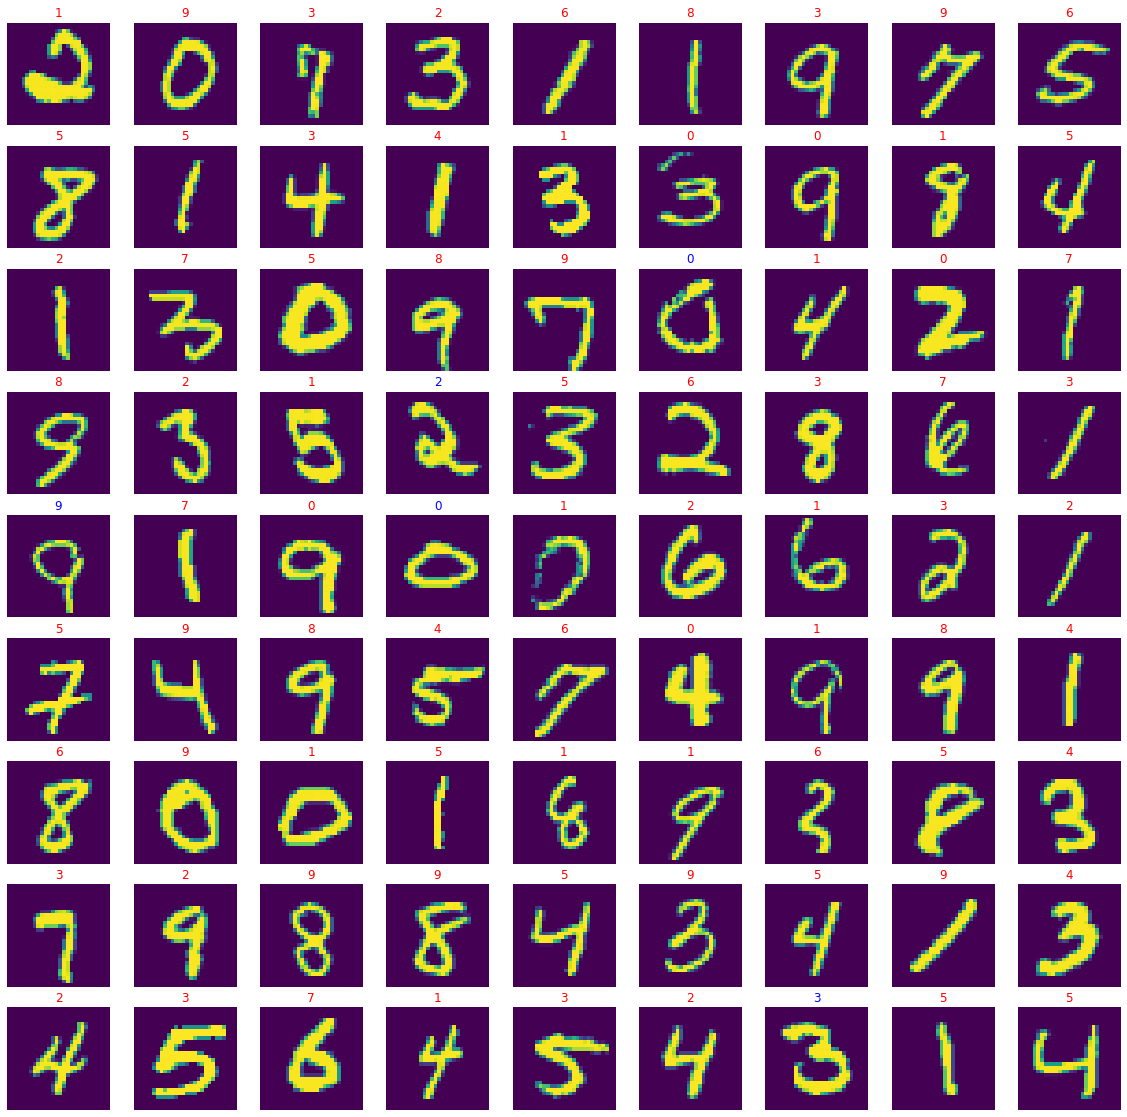

In [28]:
plt.figure(figsize=(20, 20))

for images, labels in ds_test.take(1):
    for i in range(81):
        ax = plt.subplot(9, 9, i + 1)
        image = np.squeeze(images[i])
        plt.imshow(image)
        prediction = pred[i] == classes[labels[i]]
        plt.title(pred[i], color=('blue' if prediction else 'red'))
        plt.axis('off')